In [1]:
library(nnet)
wholeSet = read.csv("./merged.csv")
set.seed(100)
trainingSize = nrow(wholeSet) * .9
trainingSetIndices = sample(1:nrow(wholeSet), trainingSize)
testingSetIndices = setdiff(rownames(wholeSet),trainingSetIndices)
trainingSet = wholeSet[trainingSetIndices,]
testingSet = wholeSet[testingSetIndices,]
formula = set~iperf+sysbench+ycruncher+pgbench

In [2]:
multinomModel <- multinom(formula, data=trainingSet) # multinom Model
summary (multinomModel) # model summary

# weights:  288 (235 variable)
initial  value 12291.063210 
iter  10 value 12149.061035
iter  20 value 12126.193083
iter  30 value 12112.849903
iter  40 value 11930.875351
iter  50 value 11899.118787
iter  60 value 11861.825523
iter  70 value 11860.306227
iter  80 value 11848.664796
iter  90 value 11844.793845
iter 100 value 11842.398158
final  value 11842.398158 
stopped after 100 iterations


Call:
multinom(formula = formula, data = trainingSet)

Coefficients:
     (Intercept)         iperf      sysbench     ycruncher      pgbench
2  -2.488179e-07  4.343120e-06 -2.113230e-06 -1.691392e-06 6.998505e-05
3  -2.326211e-07  4.341971e-06 -2.100071e-06 -1.666973e-06 7.417311e-05
4  -2.370866e-07  4.274968e-06 -2.141208e-06 -1.776611e-06 7.929295e-05
5  -2.498229e-07  4.300168e-06 -2.255798e-06 -1.968576e-06 8.735082e-05
6  -3.186848e-07  3.889465e-06 -2.877659e-06 -2.381879e-06 9.252156e-05
7  -3.090413e-07  3.826932e-06 -2.789733e-06 -2.447536e-06 9.629833e-05
8  -2.897977e-07  3.858173e-06 -2.613798e-06 -2.408848e-06 9.829312e-05
9  -3.245017e-07  4.009823e-06 -2.930234e-06 -2.918709e-06 1.052942e-04
10 -2.348647e-07  3.599599e-06 -2.119212e-06 -2.495764e-06 1.036137e-04
11 -1.868403e-07  2.127524e-06 -1.687574e-06 -2.225764e-06 1.026757e-04
12 -2.924655e-07  3.174715e-06 -2.639855e-06 -3.080933e-06 1.107058e-04
13 -2.601499e-07  2.634436e-06 -2.352120e-06 -2.845967e-06 1.102091

In [3]:
predicted_scores <- predict (multinomModel, testingSet, "probs")
predicted_scores

,1,2,3,4,5,6,7,8,9,10,⋯,39,40,41,42,43,44,45,46,47,48
1,1.127412e-04,0.0019809217,0.0023515626,0.0029001311,0.0040339939,0.004985355,0.005819287,0.006314666,0.008411443,0.007852025,⋯,0.03448339,0.03423812,0.03488933,0.03546571,0.03587607,0.03362891,0.03533921,0.03853611,0.03843356,0.03860254
3,1.305468e-04,0.0021221817,0.0025075583,0.0030749765,0.0042390786,0.005208797,0.006054648,0.006555517,0.008664612,0.008103472,⋯,0.03418740,0.03395079,0.03457888,0.03513452,0.03552994,0.03336297,0.03501260,0.03809036,0.03799176,0.03815425
18,1.227304e-06,0.0002287732,0.0003128047,0.0004585317,0.0008371066,0.001231752,0.001633234,0.001895676,0.003198076,0.002820800,⋯,0.04193321,0.04139126,0.04283798,0.04413714,0.04507377,0.04005718,0.04385030,0.05135459,0.05110475,0.05151570
20,1.981375e-04,0.0025801155,0.0030084563,0.0036298487,0.0048778465,0.005896306,0.006772264,0.007286289,0.009419162,0.008856242,⋯,0.03332381,0.03311157,0.03367508,0.03417296,0.03452688,0.03258373,0.03406389,0.03681105,0.03672337,0.03686802
30,1.227300e-06,0.0002287708,0.0003128014,0.0004585270,0.0008370979,0.001231740,0.001633219,0.001895657,0.003198044,0.002820773,⋯,0.04193326,0.04139133,0.04283807,0.04413723,0.04507389,0.04005728,0.04385041,0.05135478,0.05110493,0.05151591
43,1.227308e-06,0.0002287754,0.0003128077,0.0004585360,0.0008371144,0.001231763,0.001633248,0.001895692,0.003198104,0.002820823,⋯,0.04193317,0.04139120,0.04283793,0.04413708,0.04507368,0.04005712,0.04385024,0.05135447,0.05110465,0.05151558
50,1.649217e-04,0.0023677888,0.0027770572,0.0033746718,0.0045861989,0.005583905,0.006447334,0.006956025,0.009080467,0.008517811,⋯,0.03370813,0.03348535,0.03407710,0.03460023,0.03497233,0.03293144,0.03448562,0.03737699,0.03728456,0.03743705
63,1.427913e-04,0.0022132964,0.0026077818,0.0031867658,0.0043691813,0.005349829,0.006202633,0.006706640,0.008822245,0.008260351,⋯,0.03400475,0.03377346,0.03438756,0.03493067,0.03531708,0.03319872,0.03481158,0.03781739,0.03772119,0.03787981
80,1.227302e-06,0.0002287719,0.0003128030,0.0004585292,0.0008371018,0.001231746,0.001633226,0.001895665,0.003198058,0.002820785,⋯,0.04193324,0.04139130,0.04283804,0.04413721,0.04507385,0.04005725,0.04385038,0.05135472,0.05110489,0.05151585
83,1.518340e-04,0.0022779375,0.0026787112,0.0032656427,0.0044605438,0.005448554,0.006305988,0.006812058,0.008931730,0.008369416,⋯,0.03387863,0.03365093,0.03425546,0.03479001,0.03517026,0.03308504,0.03467281,0.03762956,0.03753498,0.03769094


In [4]:
predicted_class <- predict (multinomModel, testingSet)
table(predicted_class, testingSet$set)

               
predicted_class  1  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23
             1   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             2   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             3   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             4   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             5   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             6   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             7   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             8   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             9   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             12  0  0  0  0  0  0  0

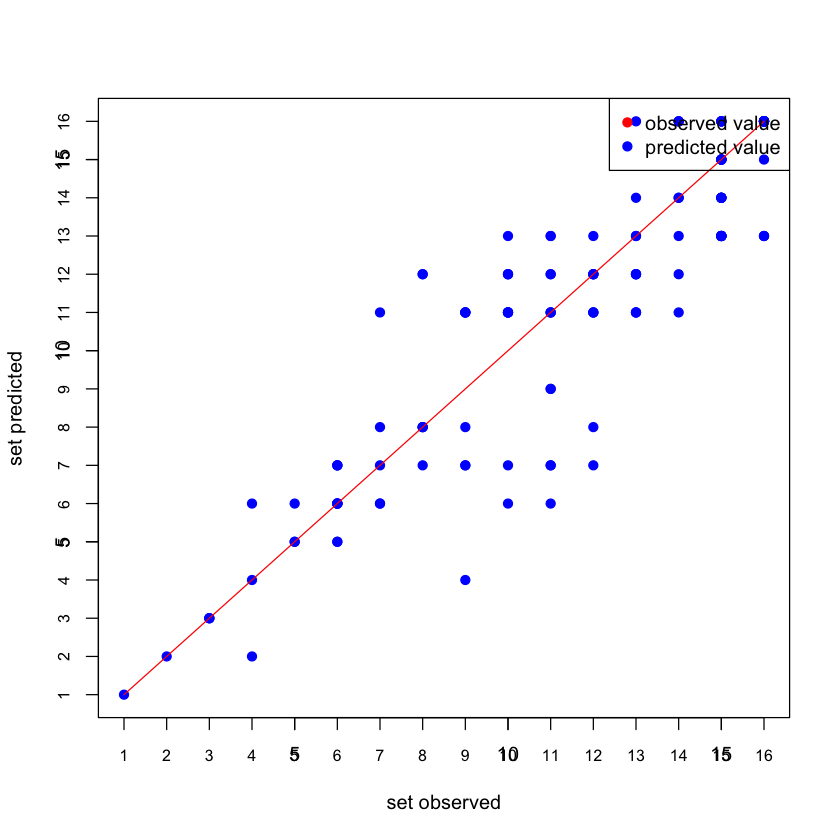

In [61]:
plot(x = testingSet$set , y = predicted_class,col="blue",pch=19,xlab="set observed",ylab="set predicted")
axis(1,1:16,1:16,cex.axis=0.8)
axis(2,1:16,1:16,cex.axis=0.8)
par(new=TRUE)
lines(x = range(1:16) , y = range(1:16),col="red")
legend("topright",legend=c("observed value","predicted value"),pch=19, col=c("red","blue"))

In [63]:
print("correct prediction")
mean(as.character(predicted_class) == as.character(testingSet$set))

[1] "correct prediction"


[1] 0.3676471